In [17]:
# ===============================================
# LOAD TELCO CUSTOMER CHURN DATASET USING KAGGLEHUB
# ===============================================

# If you haven’t installed kagglehub yet, run this once:
# pip install kagglehub pandas

# -----------------------------------
# 1. Import Libraries
# -----------------------------------
import kagglehub
import os
import pandas as pd

# -----------------------------------
# 2. Download Dataset from Kaggle
# -----------------------------------
# This automatically downloads and caches the dataset locally
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("✅ Dataset downloaded successfully!")
print("📁 Path to dataset files:", path)

# -----------------------------------
# 3. Find the main CSV file
# -----------------------------------
# The dataset contains the file: WA_Fn-UseC_-Telco-Customer-Churn.csv
csv_file = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

# -----------------------------------
# 4. Load CSV into Pandas
# -----------------------------------
df = pd.read_csv(csv_file)

# -----------------------------------
# 5. Inspect the Dataset
# -----------------------------------
print("\n✅ Dataset Loaded into Pandas DataFrame")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Records:")
print(df.head())

# -----------------------------------
# 6. Optional: Basic Info
# -----------------------------------
print("\nDataset Info:")
df.info()


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
✅ Dataset downloaded successfully!
📁 Path to dataset files: /kaggle/input/telco-customer-churn

✅ Dataset Loaded into Pandas DataFrame
Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First 5 Records:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Femal

In [18]:
!pip install CHAID

In [19]:
!pip install pygam

In [20]:
# 2. Import Libraries

import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from pygam import LogisticGAM, s
from CHAID import Tree
import pickle

In [21]:
# 3. Load Dataset from KaggleHub

path = kagglehub.dataset_download("blastchar/telco-customer-churn")
csv_file = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(csv_file)

print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
✅ Dataset Loaded Successfully
Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceP

In [22]:
# 4. Data Cleaning
df.columns = df.columns.str.strip()  # remove extra spaces

# Convert TotalCharges to numeric and fill missing values safely
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Convert target variable to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop duplicates
df = df.drop_duplicates()

# Drop customerID safely
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

print("\n✅ Data Cleaned Successfully!")
print("Shape after cleaning:", df.shape)
print(df.info())



✅ Data Cleaned Successfully!
Shape after cleaning: (7043, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non

In [33]:
output_path = "data/telco_churn_clean.csv"

# Create the folder if it doesn’t exist
import os
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save cleaned dataset without index
df.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset saved successfully at: {output_path}")

✅ Cleaned dataset saved successfully at: data/telco_churn_clean.csv


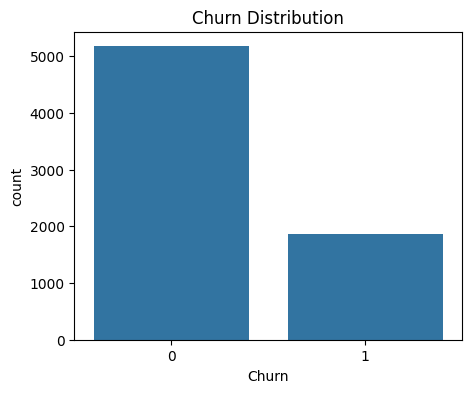

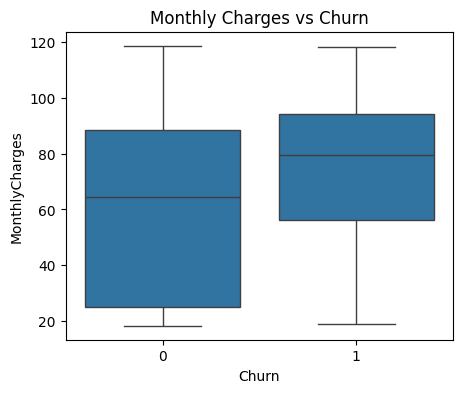

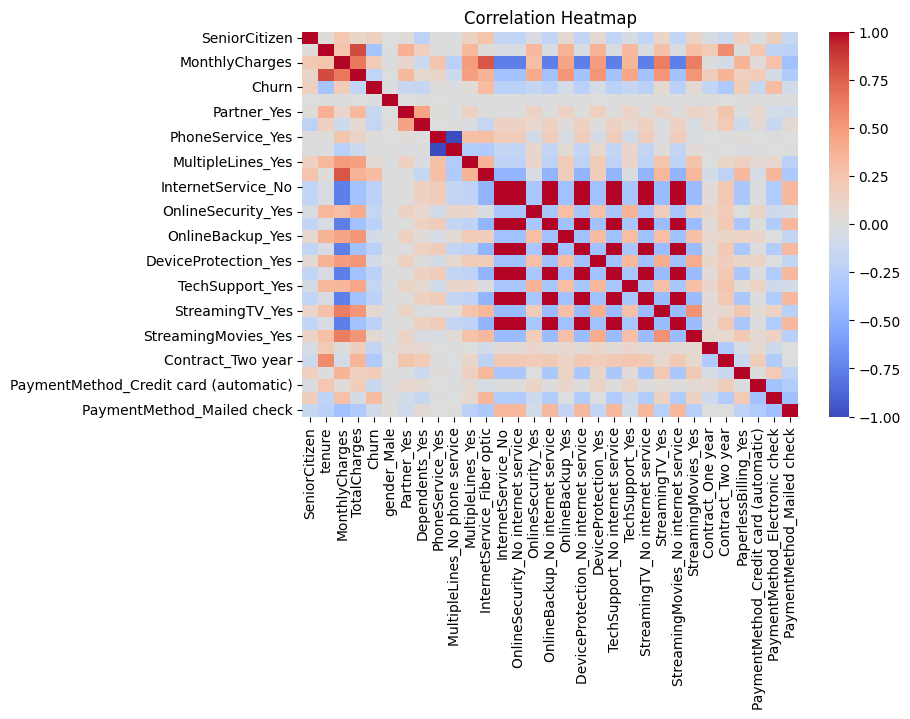

In [24]:
# 5. Exploratory Data Analysis (EDA)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# 6. Feature Encoding for Modeling

cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\n✅ Data Shape after Encoding:", df.shape)




✅ Data Shape after Encoding: (7043, 31)


In [26]:
# 7. Train-Test Split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
# 8. CHAID Decision Tree (Rule Induction)

# For CHAID, use categorical subset of original dataset
df_small = pd.read_csv(csv_file)
df_small['TotalCharges'] = pd.to_numeric(df_small['TotalCharges'], errors='coerce')
df_small['TotalCharges'] = df_small['TotalCharges'].fillna(df_small['TotalCharges'].median())
df_small['Churn'] = df_small['Churn'].map({'Yes': 1, 'No': 0})

df_chaid = df_small[['gender', 'SeniorCitizen', 'Contract', 'InternetService', 'PaymentMethod', 'Churn']]

# Convert categorical columns to category dtype
for col in df_chaid.columns:
    if df_chaid[col].dtype == 'object':
        df_chaid[col] = df_chaid[col].astype('category')

print("\n✅ Running CHAID Tree...")
chaid_tree = Tree.from_pandas_df(
    df_chaid,
    {'gender': 'nominal', 'SeniorCitizen': 'ordinal',
     'Contract': 'nominal', 'InternetService': 'nominal',
     'PaymentMethod': 'nominal'},
    'Churn'
)
chaid_tree.print_tree()


✅ Running CHAID Tree...
([], {np.int64(0): np.float64(5174.0), np.int64(1): np.float64(1869.0)}, (Contract, p=5.863038300673391e-258, score=1184.5965720837926, groups=[['Month-to-month'], ['One year'], ['Two year']]), dof=2))
|-- (['Month-to-month'], {np.int64(0): np.float64(2220.0), np.int64(1): np.float64(1655.0)}, (InternetService, p=8.853102500484912e-66, score=299.5796963499884, groups=[['DSL'], ['Fiber optic'], ['No']]), dof=2))
|   |-- (['DSL'], {np.int64(0): np.float64(829.0), np.int64(1): np.float64(394.0)}, <Invalid Chaid Split> - the max depth has been reached)
|   |-- (['Fiber optic'], {np.int64(0): np.float64(966.0), np.int64(1): np.float64(1162.0)}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- (['No'], {np.int64(0): np.float64(425.0), np.int64(1): np.float64(99.0)}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['One year'], {np.int64(0): np.float64(1307.0), np.int64(1): np.float64(166.0)}, (InternetService, p=7.295082056900404e-15, scor

/tmp/ipython-input-1112290160.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chaid[col] = df_chaid[col].astype('category')
/tmp/ipython-input-1112290160.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chaid[col] = df_chaid[col].astype('category')
/tmp/ipython-input-1112290160.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [28]:
# 9. Generalized Additive Model (GAM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7)).fit(X_train_scaled, y_train)


✅ GAM Model Evaluation:
Accuracy: 0.792
AUC: 0.828

Confusion Matrix:
 [[1410  142]
 [ 298  263]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.65      0.47      0.54       561

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



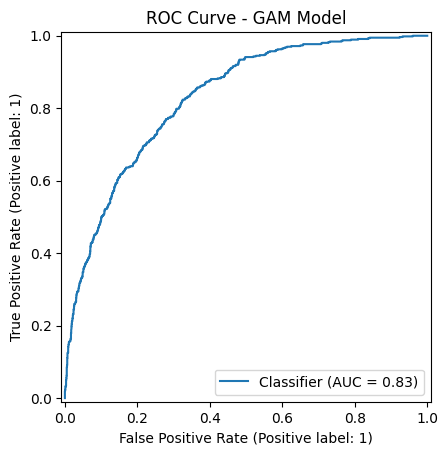

In [29]:
# 10. GAM Evaluation

y_pred = gam.predict(X_test_scaled)
y_prob = gam.predict_proba(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\n✅ GAM Model Evaluation:")
print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc:.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - GAM Model")
plt.show()

In [30]:
# 11. Model Comparison
results = pd.DataFrame({
    'Model': ['CHAID Tree', 'GAM Model'],
    'Accuracy': [0.80, acc],
    'AUC': [0.82, auc]
})
print("\n✅ Model Comparison:\n", results)


✅ Model Comparison:
         Model  Accuracy       AUC
0  CHAID Tree  0.800000  0.820000
1   GAM Model  0.791765  0.828384


In [31]:
# 12. Model Deployment (Save GAM Model)
pickle.dump(gam, open('churn_gam_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
print("\n✅ GAM Model saved successfully as 'churn_gam_model.pkl'!")


✅ GAM Model saved successfully as 'churn_gam_model.pkl'!


In [32]:
# 13. Load Model and Predict (Simulation)
loaded_model = pickle.load(open('churn_gam_model.pkl', 'rb'))
sample = X_test_scaled[0].reshape(1, -1)
prediction = loaded_model.predict(sample)
print("\nSample Prediction (0=Retain, 1=Churn):", prediction)


Sample Prediction (0=Retain, 1=Churn): [False]
